In [1]:
import logging
import numpy as np
import mxnet as mx
from mxnet import gluon
from mxnet.gluon import nn
from mxnet import autograd as ag
mx.random.seed(123)

In [2]:
BATCH_SIZE = 128
NUM_CLASSES = 10
EPOCHS = 25
ctx = [mx.gpu() if mx.test_utils.list_gpus() else mx.cpu()]

In [3]:
# dataset
def cifar10_iterator(batch_size, data_shape, resize=-1):
    mx.test_utils.get_cifar10()
    train=mx.io.ImageRecordIter(
        path_imgrec="data/cifar/train.rec",
        resize=resize,
        data_shape=data_shape,
        batch_size=batch_size,
        rand_crop=True,
        rand_mirror=True)
    val = mx.io.ImageRecordIter(
        path_imgrec="data/cifar/test.rec",
        resize=resize,
        rand_crop=False,
        rand_mirror=False,
        data_shape=data_shape,
        batch_size=batch_size)
    return train, val
train_data, val_data = cifar10_iterator(BATCH_SIZE, (3, 32, 32))

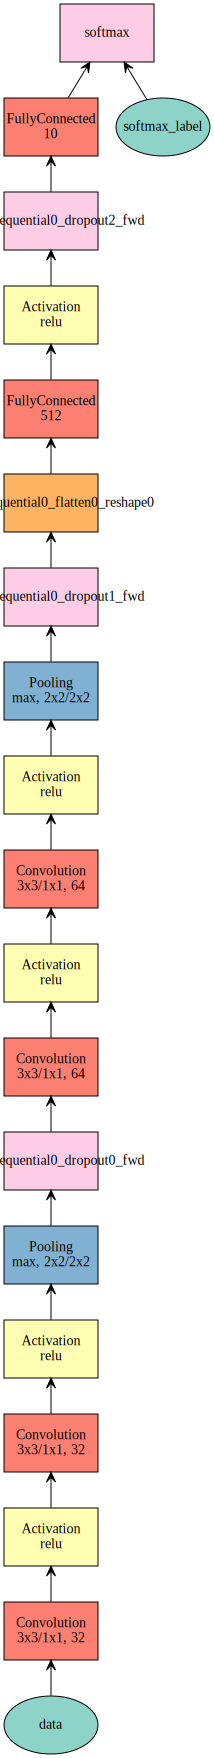

In [4]:
# define network
net = nn.HybridSequential()
with net.name_scope():
    net.add(nn.Conv2D(32, kernel_size=(3, 3), activation='relu'))
    net.add(nn.Conv2D(32, kernel_size=(3, 3), activation='relu'))
    net.add(nn.MaxPool2D(pool_size=(2, 2)))
    net.add(nn.Dropout(0.25))
    net.add(nn.Conv2D(64, kernel_size=(3, 3), activation='relu'))
    net.add(nn.Conv2D(64, kernel_size=(3, 3), activation='relu'))
    net.add(nn.MaxPool2D(pool_size=(2, 2)))
    net.add(nn.Dropout(0.25))
    net.add(nn.Flatten())
    net.add(nn.Dense(512, activation='relu'))
    net.add(nn.Dropout(0.5))
    net.add(nn.Dense(NUM_CLASSES))
net.initialize(ctx=ctx)
# to symbol
net = mx.sym.SoftmaxOutput(net(mx.sym.var('data')), name='softmax')
mx.viz.plot_network(net)

In [5]:
mod = mx.mod.Module(symbol=net, context=ctx)

In [6]:
%%time
logging.getLogger().setLevel(logging.INFO)
train_data.reset()
mod.fit(
    train_data,
    eval_data=val_data,
    optimizer='adam',
    optimizer_params={'learning_rate': 0.001},
    eval_metric='acc',
    num_epoch=EPOCHS)

INFO:root:Epoch[0] Train-accuracy=0.231937
INFO:root:Epoch[0] Time cost=2.010
INFO:root:Epoch[0] Validation-accuracy=0.394877
INFO:root:Epoch[1] Train-accuracy=0.425332
INFO:root:Epoch[1] Time cost=1.864
INFO:root:Epoch[1] Validation-accuracy=0.491486
INFO:root:Epoch[2] Train-accuracy=0.478486
INFO:root:Epoch[2] Time cost=1.834
INFO:root:Epoch[2] Validation-accuracy=0.512921
INFO:root:Epoch[3] Train-accuracy=0.514506
INFO:root:Epoch[3] Time cost=1.915
INFO:root:Epoch[3] Validation-accuracy=0.561398
INFO:root:Epoch[4] Train-accuracy=0.539162
INFO:root:Epoch[4] Time cost=1.958
INFO:root:Epoch[4] Validation-accuracy=0.578726
INFO:root:Epoch[5] Train-accuracy=0.559655
INFO:root:Epoch[5] Time cost=1.905
INFO:root:Epoch[5] Validation-accuracy=0.585837
INFO:root:Epoch[6] Train-accuracy=0.577665
INFO:root:Epoch[6] Time cost=1.934
INFO:root:Epoch[6] Validation-accuracy=0.625401
INFO:root:Epoch[7] Train-accuracy=0.590204
INFO:root:Epoch[7] Time cost=1.903
INFO:root:Epoch[7] Validation-accuracy=0

CPU times: user 2min 12s, sys: 1min 15s, total: 3min 27s
Wall time: 54.1 s
